## In this notebook we read in timestamped data of stars to repos. We select some top repos by total stars, then plot the timeseries of stars they received every month since December 2014.

Here we read in the data directly from a curated CSV. It is also possible to query this data from the database directly. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../preprocessed/usage.csv')
df['timestamp']=pd.to_datetime(df['timestamp'])

In [3]:
df.head()

,repo_id,timestamp,repo_name,stars,forks,commits,commits_cumul,developers,active_developers,downloads
0,1,2019-10-01,GitHub/misalcedo/ppp,1,0,60,88,1,1,73
1,1,2019-11-01,GitHub/misalcedo/ppp,1,0,4,92,1,1,110
2,1,2019-12-01,GitHub/misalcedo/ppp,2,1,0,92,1,0,156
3,1,2020-01-01,GitHub/misalcedo/ppp,3,2,4,96,3,3,243
4,1,2020-02-01,GitHub/misalcedo/ppp,4,2,0,96,3,0,288


In [4]:
#selecting the J'th through K'th top repos by their all-time highest star count
j= 3
k = 5
topk=df.groupby('repo_id')['stars'].max().sort_values().tail(k).head(j)
print(topk)

repo_id
38666    33316
41666    36005
2900     38464
Name: stars, dtype: int64


In [5]:
topk_repoids=list(topk.index)

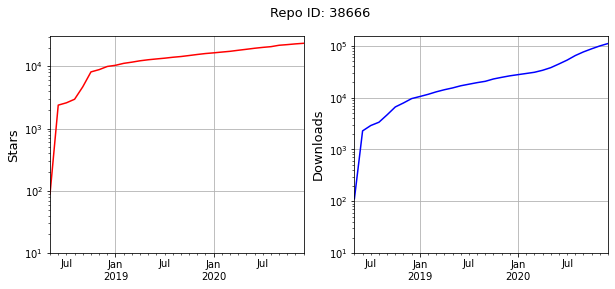

---------


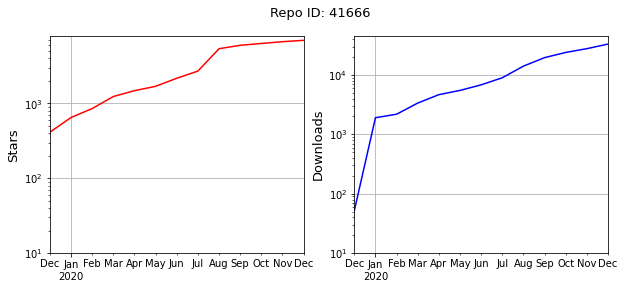

---------


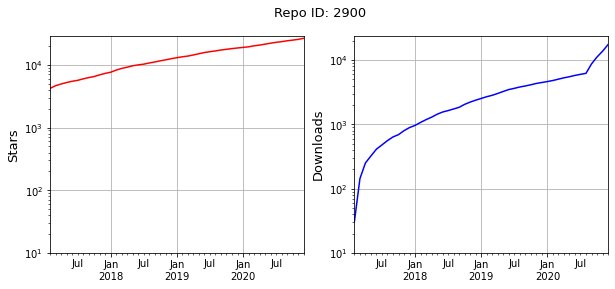

---------


In [6]:
for repo in topk_repoids:
    repo_df = df[df['repo_id']==repo].set_index('timestamp')
    repo_df=repo_df.loc[(repo_df.index > '2014-01-01 00:00:00')&(repo_df.index < '2021-01-01 00:00:00')]
    f,ax=plt.subplots(1,2,figsize=(10,4))
    repo_df.stars.plot(color='red',ax=ax[0])
    ax[0].set_ylabel('Stars',size=13)
    ax[0].semilogy()
    ax[0].set_xlabel('')
    ax[0].set_ylim(bottom=10)
    repo_df.downloads.plot(color='blue',ax=ax[1])
    ax[1].set_ylabel('Downloads',size=13)
    ax[1].semilogy()
    ax[1].set_xlabel('')
    ax[1].set_ylim(bottom=10)
    plt.suptitle('Repo ID: '+str(repo),size=13)
    ax[0].grid()
    ax[1].grid()
    plt.show()
    print('---------')

## The monthly dynamics of stars are rather volatile. In some months a repo can get many times more stars than in another month.

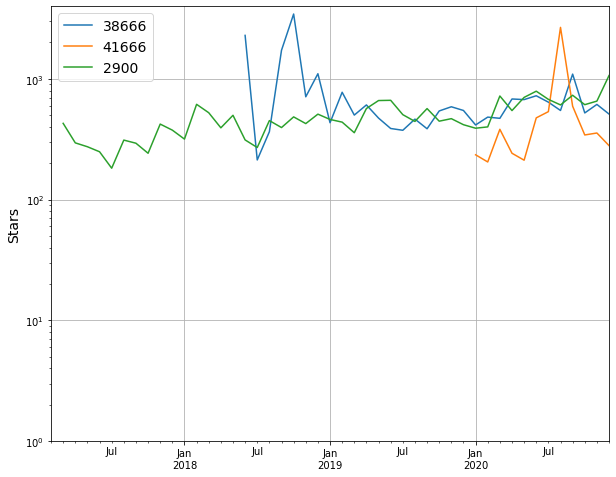

In [7]:
plt.figure(figsize=(10,8))
for repo in topk_repoids:
    repo_df = df[df['repo_id']==repo].set_index('timestamp')
    repo_df=repo_df.loc[(repo_df.index > '2014-01-01 00:00:00')&(repo_df.index < '2021-01-01 00:00:00')]
    repo_df.stars.diff().plot(label=repo)
    
plt.ylabel('Stars',size=14)
plt.xlabel('')
plt.grid()
plt.semilogy()
plt.ylim(bottom=1)

plt.legend(prop={'size':14})

## We can recreate this plot for Downloads - a measure of use rather than popular success or visibility.

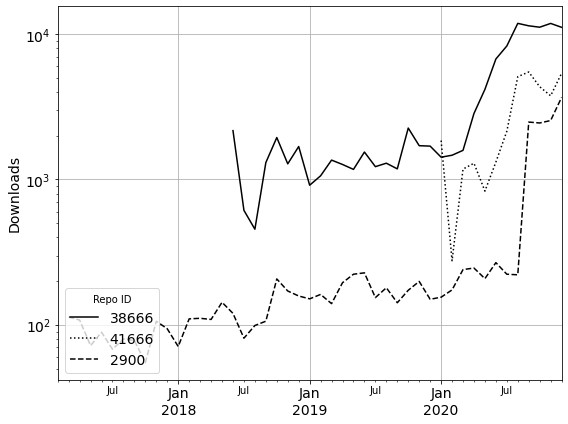

In [8]:
plt.figure(figsize=(8,6))
linestyles=['--',':','-']
for repo in topk_repoids:
    repo_df = df[df['repo_id']==repo].set_index('timestamp')
    repo_df=repo_df.loc[(repo_df.index > '2014-01-01 00:00:00')&(repo_df.index < '2021-01-01 00:00:00')]
    repo_df.downloads.diff().plot(label=repo,linestyle=linestyles.pop(),color='black')
    
plt.ylabel('Downloads',size=14)
plt.xlabel('')
plt.semilogy()
plt.yticks(size=14)
plt.xticks(size=14)

plt.grid()
plt.legend(title="Repo ID",prop={'size':14},loc='lower left')
plt.tight_layout()
plt.show()